<a href="https://colab.research.google.com/github/Olivyat/Olivyat/blob/main/Copy_of_Part_1_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Financial inclusion in East Africa **





1.   Defining the question
a) Specifying the Question
> Which individuals in Kenya, Rwanda, Tanzania, and Uganda 
are likely to have or use bank accounts.

b) Defining the Metric for Success

> It will be considered a success when we have succesfully visualized which individuals are likely to have a bank account.

c) Understanding the context

> Financial Inclusion still is a key hindrance to economic and human growth in Africa. For instance, in East Africa(Kenya, Rwanda, Tanzania, and Uganda) only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
The fact is that this problem is aggravated when the indicator of access to banks becomes the basis for measuring the financial inclusion indicator. Even though there is a rapd increase of mobile money in Africa and the growth of innovative fintech solutions, banks still play a major role in facilitating access to financial services. which can bring several benefits such as household savings and facilitate payments and for businesses it provides the possibility of credit or financing thus access to bank accounts is an important accelerator to long-term economic growth.
Thus, the present notebook proposes to create a model to predict which individuals are more likely to have or use a bank account.

e) Data Relevance
> For our data to be relevant we compared our data with the following data provided by the world bank regarding people with account ownership in financial institutions or with a mobile money service provider heres is the link(https://data.worldbank.org/indicator/FX.OWN.TOTL.FE.ZS?locations=KE.html)

2.   Reading the Data







In [1]:
# Loading the Data from the source 
# ---
# Dataset url = https://bit.ly/FinancialDataset
# Attribute Information: https://bit.ly/VariableDefinitions
# import libraries
# install
!pip install gdown
# dataframe and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style()

# Loading the Data from the source url
Financial_data = pd.read_csv('https://bit.ly/FinancialDataset')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Loading the Data from the source url that contains all column definitions.
dataset_vars = pd.read_csv('https://bit.ly/VariableDefinitions')
dataset_vars

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


3. Checking the Data


In [3]:
# Determining the no. of records in our dataset
Financial_data.shape


(23524, 13)

In [4]:
# Previewing the top of our dataset
Financial_data.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
Financial_data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate datatype
Financial_data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
# getting the general information of the dataset
Financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


4. External Data Source Validation

> Compared the financial dataset with data provided by the world bank regarding people with account ownership in financial institutions or
with a mobile money service provider.Have a look at the following link (https://data.worldbank.org/indicator/FX.OWN.TOTL.FE.ZS?locations=KE.html)




5. Cleaning the Dataset

In [8]:
#checking the number of missing values per column
missing_values = Financial_data.isnull().sum()
missing_values

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [9]:
#  total missing values in the dataset
total_cells = np.product(Financial_data.shape)
total_missing = missing_values.sum()

In [10]:
# data that is missing values as a percentage
(total_missing/total_cells) * 100
# 0.0873% of the cells in this dataset are empty.Next step, try take a closer look at some of the columns with missing values and try to 
# figure out what might be the cause

0.08730854250323727

In [11]:
# To find the columns with the highest percentage of missing data first,
Financial_data.isnull().sum().sort_values(ascending = False)/len(Financial_data)

Has a Bank account        0.001530
Respondent Age            0.001445
gender_of_respondent      0.001445
marital_status            0.001360
Type of Job               0.001275
Level of Educuation       0.001233
household_size            0.001190
Type of Location          0.000638
country                   0.000595
Cell Phone Access         0.000468
The relathip with head    0.000170
year                      0.000000
uniqueid                  0.000000
dtype: float64

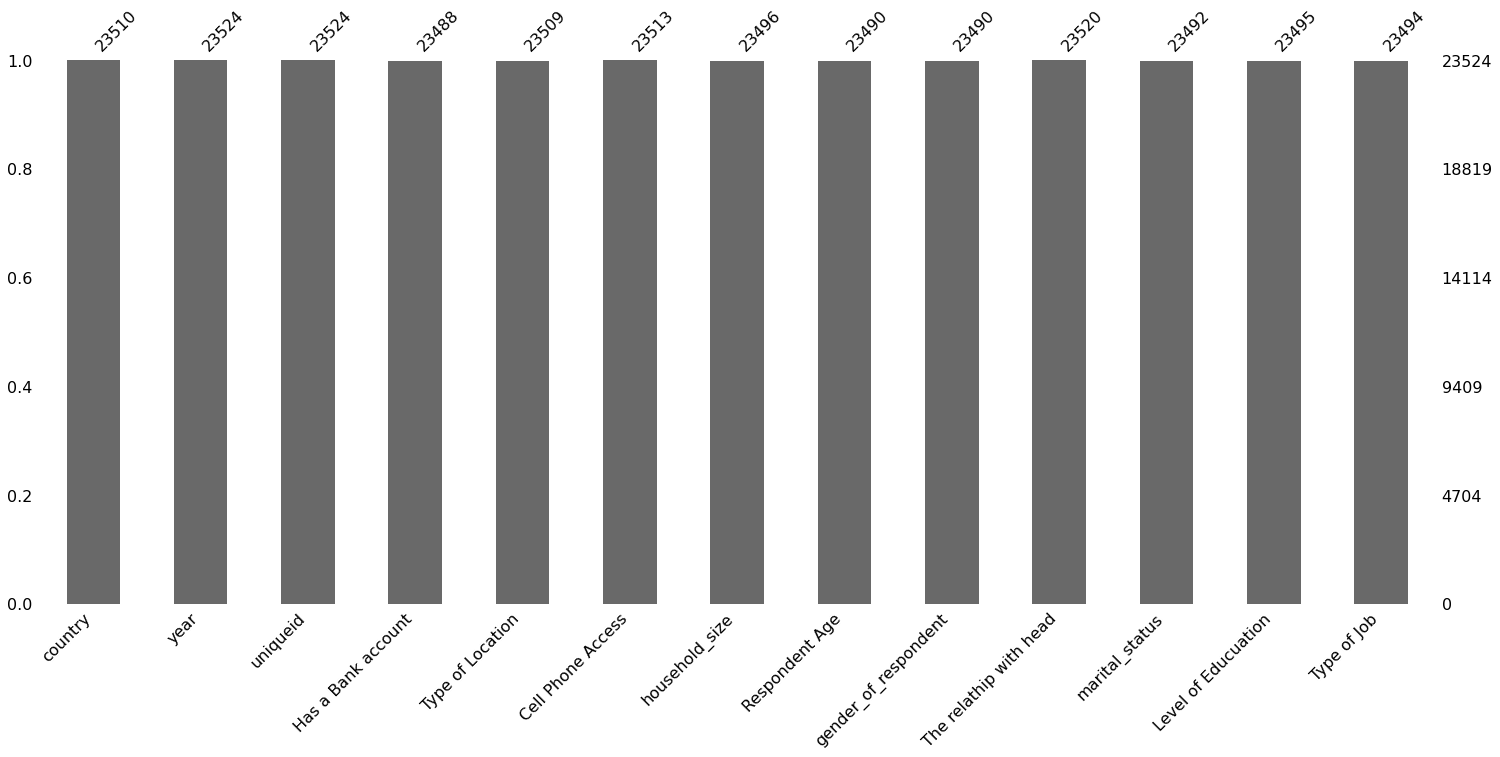

In [12]:
#import the missing number module to help us decide what to do with missing values
import missingno as msno
msno.bar(Financial_data)


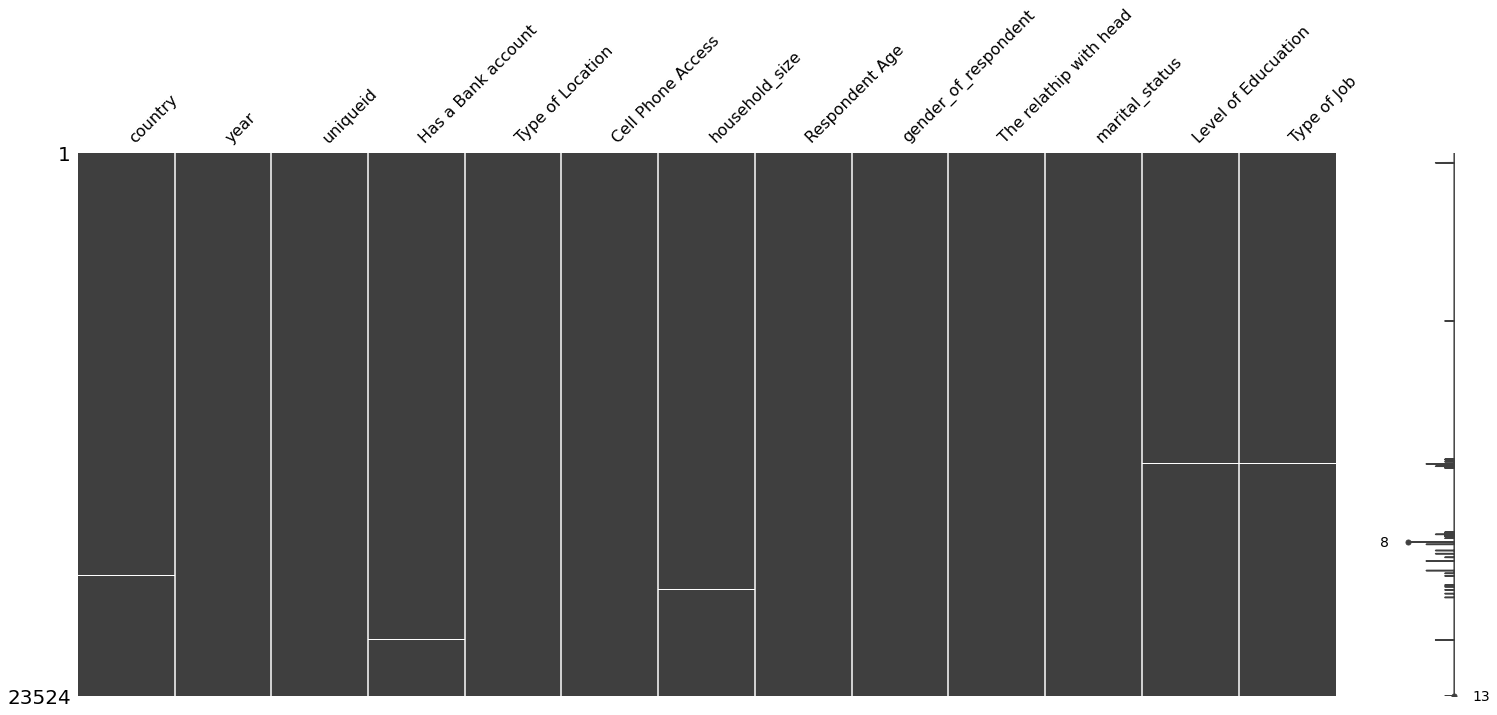

In [13]:
# We can see the columns above with missing values have no difference with those without. 
# Next,it would make sense to find out the locations of the missing data.
msno.matrix(Financial_data)



>
*   The country, has a bank account and household size Columns with very few missing values and do not seem to be correlated with any other column, Hence, the missingness can be attributed as Missing Completely at Random.
*  Both the level of education and the type of job columns have few(almost same no) missing values at the same location.This could be acase of missing not at random since both columns have same missingness pattern.








In [14]:
# dropping rows with the missing values(missing cells percentage is small;0.087%) and naming the new dataset as Financial_data1
Financial_data1 = Financial_data.dropna()

In [15]:
# checking for missing values in the new dataset
Financial_data1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [16]:
Financial_data1.shape

(23343, 13)

In [17]:
Financial_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [18]:
# checking for unique values in each column
Financial_data1.nunique()

country                      4
year                         6
uniqueid                  8687
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [19]:
# checking values for each unique value
for column in Financial_data1.columns:
    print(column)
    print(Financial_data1[column].value_counts())
    print('*********************************')

country
Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64
*********************************
year
2016    8683
2018    8157
2017    6500
2029       1
2056       1
2039       1
Name: year, dtype: int64
*********************************
uniqueid
uniqueid_1       4
uniqueid_1371    4
uniqueid_1401    4
uniqueid_1400    4
uniqueid_1399    4
                ..
uniqueid_7302    1
uniqueid_7301    1
uniqueid_7300    1
uniqueid_7299    1
uniqueid_8759    1
Name: uniqueid, Length: 8687, dtype: int64
*********************************
Has a Bank account
No     20046
Yes     3297
Name: Has a Bank account, dtype: int64
*********************************
Type of Location
Rural    14264
Urban     9079
Name: Type of Location, dtype: int64
*********************************
Cell Phone Access
Yes    17334
No      6009
Name: Cell Phone Access, dtype: int64
*********************************
household_size
2.0     5072
1.0     3928
3.0     3514
4.0     3200
5.0   

From the above brief analysis;
*   the East Africa countries are four;Uganda, Kenya, Tanzania and Rwanda
*  the data is from the 6 year period(2016,2017,2018,2029,2056 and 2039), therefore years 2029,2056 & 2039 need to be dropped off, since the original dataset covers years 2016,2017 &2018
*  Level of Educuation with category as 6 which needs to be dropped
*   the unique values are used in each country(each appears 4 times i.e. for each country)and serve as serial nos. and therefore need to be dropped off
*   has a bank account and has a phone access is represented as YES or NO and this in actual sense are boolean
*   year,age, household size are int
*   bank account and has access to cell phone are boolean
*   country,gender, type of location, relationship head, marital status,level of education and type of job are categorical
*   
















In [20]:
# from the column year we have unique values; 2029,2056 & 2039, we need to drop them

Financial_data1['year'].value_counts()
value = [2029, 2056, 2039]
Financial_data2= Financial_data1[Financial_data1['year'].isin(value) == False]

In [21]:
# checking the shape of the new data Financial_data2
Financial_data2.shape

(23340, 13)

In [22]:
Financial_data2['Level of Educuation'].value_counts()
value = [ "6" ]
Financial_data3= Financial_data2[Financial_data2['Level of Educuation'].isin(value) == False]

Financial_data3.shape

(23313, 13)

In [23]:
# we also need to drop column named uniqueid; this is seriel no used for interviewing in each country
Financial_data4 =pd.DataFrame(Financial_data3.drop(columns = ['uniqueid']))
Financial_data4.head()


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0, 0.5, 'Age')

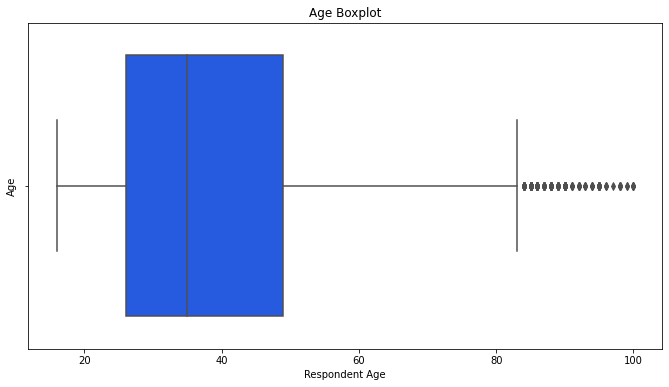

In [24]:
# checking for outliers by plotting box plot
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='Respondent Age' ,data = Financial_data4, orient='v', color='#084EFE')
fig.set_title("Age Boxplot")
fig.set_ylabel("Age")

In [25]:
# typecasting "gender" and "occupation" to category type
Financial_data4['Has a Bank account'] = Financial_data4['Has a Bank account'].astype('category')
Financial_data4['Cell Phone Access'] = Financial_data4['Cell Phone Access'].astype('category')
Financial_data4['Type of Location'] = Financial_data4['Type of Location'].astype('category')
Financial_data4['gender_of_respondent'] = Financial_data4['gender_of_respondent'].astype('category')
Financial_data4['The relathip with head'] = Financial_data4['The relathip with head'].astype('category')
Financial_data4['marital_status'] = Financial_data4['marital_status'].astype('category')
Financial_data4['Level of Educuation'] = Financial_data4['Level of Educuation'].astype('category')
Financial_data4['Type of Job'] = Financial_data4['Type of Job'].astype('category')

# checking
Financial_data4[['country','Has a Bank account','Cell Phone Access','Type of Location','gender_of_respondent','The relathip with head','marital_status','Level of Educuation','Type of Job']].dtypes

country                     object
Has a Bank account        category
Cell Phone Access         category
Type of Location          category
gender_of_respondent      category
The relathip with head    category
marital_status            category
Level of Educuation       category
Type of Job               category
dtype: object

Univariate analysis

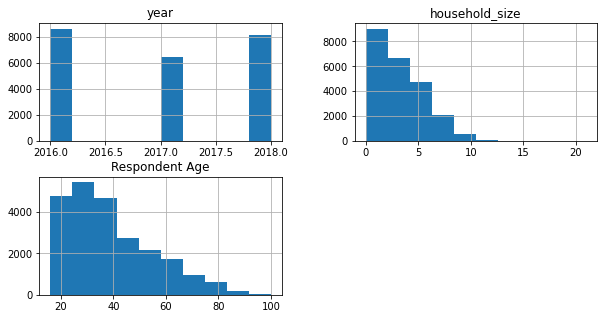

In [26]:
# checking the distribution of a numerical features by plotting its histogram,
numerical_var = ['year','household_size', 'Respondent Age']
Financial_data4[numerical_var].hist(figsize=(10,5));



*   For household_size, the histogram is right skewed hence positively skewed distribution
*   similarly, the respondent age is positively skewed distribution




In [27]:
Financial_data4.describe()

,year,household_size,Respondent Age
count,23313.000000,23313.000000,23313.000000
mean,2016.977952,3.688414,38.793549
std,0.849034,2.280842,16.510611
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


*   The average household size of the data is 3 people per household the maximum household size is 21 people in the household there are 23,313 respondents in the survey.
*  The average age of respondents of the data is 35 years and the maximum age is 100years of the 23,313 respondents in the survey.


In [28]:
# checking on the skewness & kurtosis of the 'household_size' data
from scipy import stats
a = stats.skew(Financial_data4['Respondent Age'])
print('The skewness of the respondents age is ' + str(a))
b = stats.kurtosis(Financial_data4['Respondent Age'])
print('The kurtosis of the respondents age is '+ str(b))                  

The skewness of the respondents age is 0.8412222937518089
The kurtosis of the respondents age is 0.10094784903404452


*   the respondents age data is positively skewed
*   the kurtosis for respondents age data is positive meaning it has a leptokurtic distribution



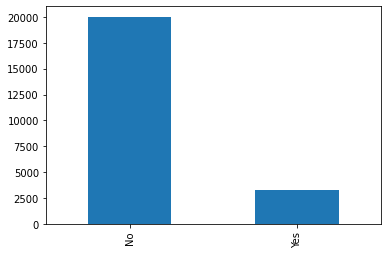

In [29]:
# checking the no of respondents with bank accounts by using bar graph
Financial_data4['Has a Bank account'].value_counts().head(10).plot.bar()

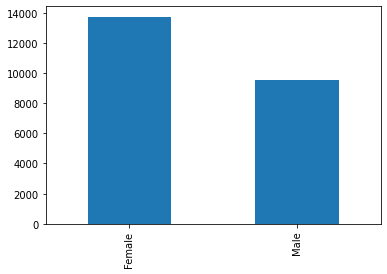

In [30]:
# checking the gender_of_respondent by using bar graph
Financial_data4['gender_of_respondent'].value_counts().head(10).plot.bar()

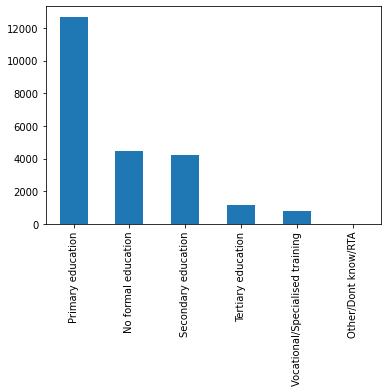

In [31]:
# checking the Level of Educuation of the respondents by using bar graph
Financial_data4['Level of Educuation'].value_counts().head(10).plot.bar()

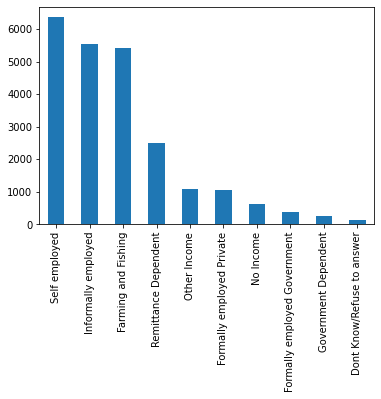

In [32]:

# checking the Type of Job of the respondents by using bar graph
Financial_data4['Type of Job'].value_counts().head(10).plot.bar()

Bivariate Analysis


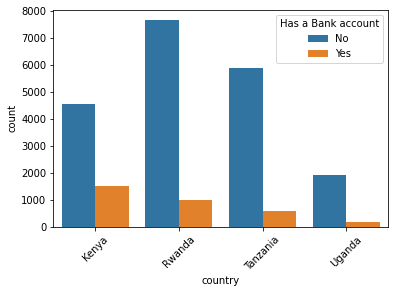

In [33]:
#visualizing the countries total respondents with regards to having access to a bank account
sns.countplot(data=Financial_data4, x= 'country', hue= 'Has a Bank account')
plt.xticks(rotation= 45);


*  Most respondents in Kenya have access to bank accounts compared to the other countries with Uganda having the least number of respondents





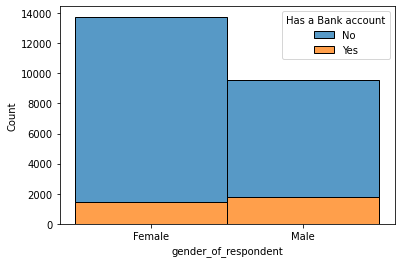

In [34]:
sns.histplot(data=Financial_data4, x= 'gender_of_respondent', hue= 'Has a Bank account', multiple= 'stack');

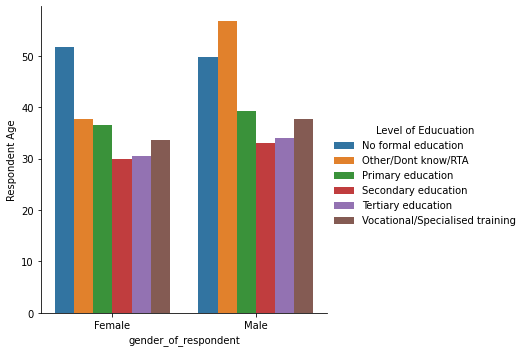

In [35]:
sns.catplot(data= Financial_data4, y= 'Respondent Age',
            x= 'gender_of_respondent',
            hue= 'Level of Educuation',
            kind= 'bar',ci= None);



*   more males have access to bank account compared to females among the repondents




In [36]:
# finding the correlation between quantitative variables:'year','household_size', 'Respondent Age'

corr_matrix = Financial_data4[numerical_var].corr()
corr_matrix 

,year,household_size,Respondent Age
year,1.000000,-0.052524,-0.017608
household_size,-0.052524,1.000000,-0.119185
Respondent Age,-0.017608,-0.119185,1.000000


<Figure size 2800x2800 with 0 Axes>

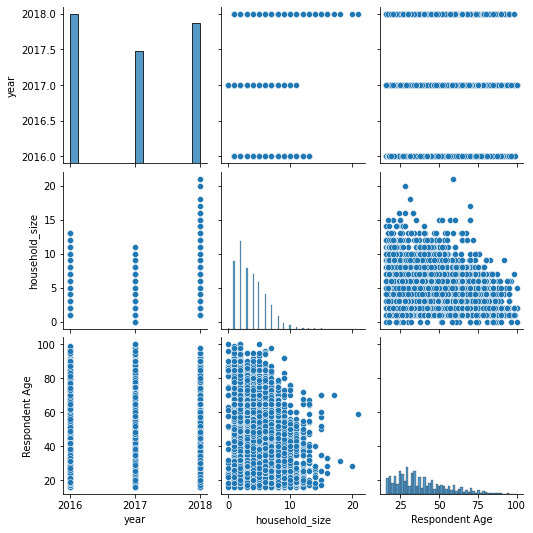

In [37]:
# visualizing the corellation of the numeric variables
plt.figure(dpi=140, figsize = (20,20))
sns.pairplot(Financial_data4[numerical_var])
plt.show()

*   the correlation between the numeric variables are negative and closer to zero meaning there exist negligible relationship between the numeric variables and therefore will be not sufficient for performing bivariate analysis
* the pairplots further displays the negligible relationship
*   in order to overcome the above, we have to convert categorical variables to numeric variables numbers so as to fit and evaluate a model.
*   List item








**Multivariate Analysis**

In [38]:
# applying label encoding to convert categorical features into dummy/indicator variables.
# One label Encoding and transformation
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in range(Financial_data4.shape[1]) :
   Financial_data4.iloc[:,i]=en.fit_transform(Financial_data4.iloc[:,i])
Financial_data5 = Financial_data4.apply(en.fit_transform)
Financial_data5_en= Financial_data4.apply(en.fit_transform)

In [39]:

Financial_data5.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2,1,0,1,3,8,0,5,2,3,9
1,0,2,0,0,0,5,54,0,1,4,0,4
2,0,2,1,1,1,5,10,1,3,3,5,9
3,0,2,0,0,1,5,18,0,1,2,2,3
4,0,2,0,1,0,8,10,1,0,3,2,5


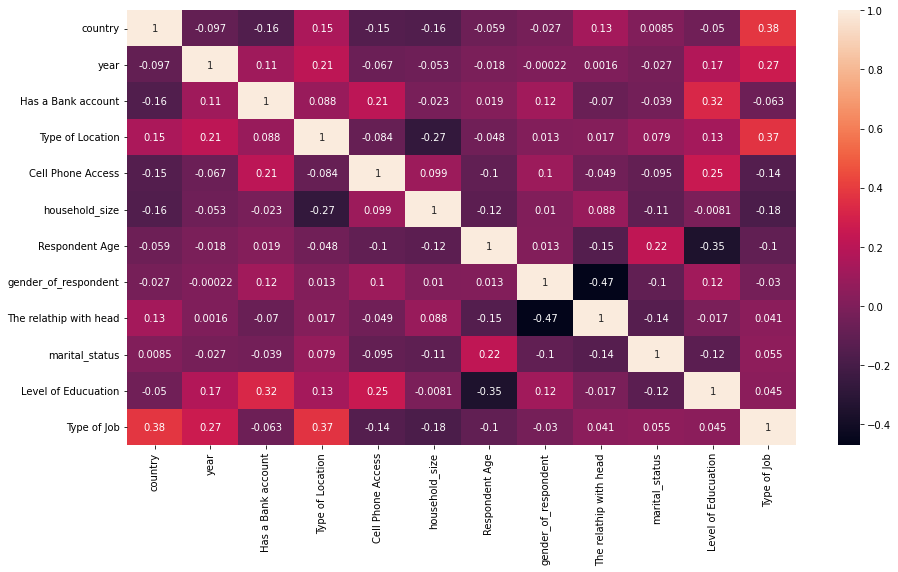

In [40]:
# the correlation matrix of our data
# using the Heatmap to visually figure out the features having major correlation between then and filter down to essential variables 
plt.figure(figsize=(15, 8))
vg_corr = Financial_data5_en.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

*  Our target variable, seems to be  correlated, with Level of education, Cell phone access and Gender of the respondents, which makes sense, since the first two are influencing factors to open a bank account, but there seems to be a lot of multicollinearity as well.
*   The issue here is, that there is collinearity between our predictor variables, for example type of job is highly correlated to type of location.

In [41]:
# splitting into dependant and independent variable


X = Financial_data5.drop(['Has a Bank account'], axis=1)

y = Financial_data5['Has a Bank account']


In [42]:
X.head()

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2,0,1,3,8,0,5,2,3,9
1,0,2,0,0,5,54,0,1,4,0,4
2,0,2,1,1,5,10,1,3,3,5,9
3,0,2,0,1,5,18,0,1,2,2,3
4,0,2,1,0,8,10,1,0,3,2,5


In [43]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Has a Bank account, dtype: int64

In [44]:
# dividing our data to form training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [45]:
# variable scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [46]:
X_train.head()

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,-1.295967,1.202365,1.238074,0.588602,1.014369,0.978011,-0.837021,-0.644707,1.610349,-1.649937,-0.143015
1,0.857468,0.024469,1.238074,-1.698941,0.137317,-1.383704,1.194713,0.412837,-2.413736,-0.001465,-0.143015
2,-0.219250,-1.153427,-0.807706,0.588602,1.452895,-1.323147,-0.837021,-1.173480,0.604328,0.822771,-1.441232
3,0.857468,0.024469,-0.807706,0.588602,-1.178262,-0.293681,-0.837021,-0.644707,-0.401693,-0.001465,-0.143015
4,-1.295967,1.202365,-0.807706,0.588602,0.137317,-1.020363,-0.837021,-1.173480,0.604328,0.822771,0.830647


In [47]:
# Applying linear regression with all the variables
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
paramLin = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
LinearReg = GridSearchCV(LinearRegression(),paramLin, cv = 10)
LinearReg.fit(X = X_train,y= y_train)
LinearRegmodel = LinearReg.best_estimator_
print(LinearReg.best_score_, LinearReg.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

0.1652775157349502 {'copy_X': True, 'fit_intercept': True, 'normalize': True}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

In [48]:
LinearReg.score(X_train,y_train)

0.1681184958409565

In [49]:
LinearReg.score(X_test,y_test)

0.17745706198334932

Text(0, 0.5, 'Predictions')

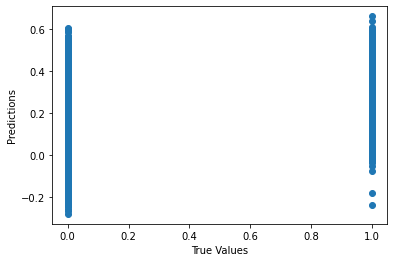

In [50]:
predictions = LinearReg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [51]:
# using ridge regression to test if multi linearity exist
from sklearn.linear_model import Ridge
paramsRidge = {'alpha':[0.01, 0.1, 1,10,100], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridgeReg = GridSearchCV(Ridge(),paramsRidge, cv = 10)
ridgeReg.fit(X = X_train,y= y_train)
Rmodel = ridgeReg.best_estimator_
print(ridgeReg.best_score_, ridgeReg.best_params_)


0.16529476460579945 {'alpha': 100, 'solver': 'saga'}


In [52]:
ridgeReg.score(X_train,y_train)

0.168111629842292

Text(0, 0.5, 'Predictions')

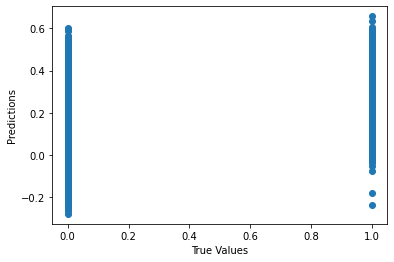

In [53]:
predictions = ridgeReg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [54]:
# Logistic Regression model with all variables
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8753




*   Logistic Regression accuracy score with all the features: 0.8753



In [55]:
# Logistic Regression with PCA
# importing PCA libraries to generate explained variance

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.17644089, 0.1530375 , 0.14169759, 0.1009265 , 0.0881575 ,
       0.07676167, 0.06965656, 0.06038319, 0.05179697, 0.04263614,
       0.0385055 ])

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6009    0]
 [ 985    0]]


0.859164998570203

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


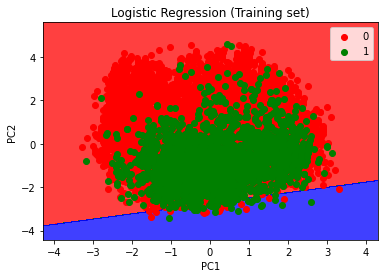

In [59]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


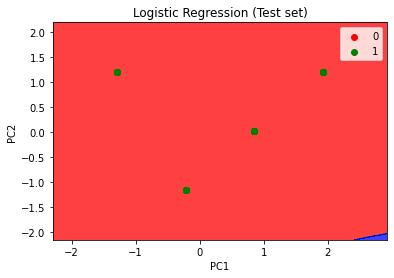

In [61]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**Part 2: Hypothesis Testing**



> Data analysis and hypothesis testing on electric car usage for Autolib electric company



Reading the Data

In [62]:
# Loading the Data from the source 
# ---
# AutolibDataset url = https://bit.ly/DSCoreAutolibDataset
# Attribute Information: https://bit.ly/DSCoreAutolibDatasetGlossary
# import libraries
# install
!pip install gdown
# dataframe and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style()

# Loading the Data from the source url
Autolib_data = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Checking the Data

In [63]:
# Previewing the top of our dataset
Autolib_data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [64]:
# Previewing the top of our dataset
Autolib_data.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [65]:
# Determining the no. of records in our dataset
Autolib_data.shape

(16085, 13)

In [66]:
Autolib_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [67]:
#checking the number of missing values per column
missing_values = Autolib_data.isnull().sum()
missing_values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64


> From above there is no missing values in the data


In [68]:
# checking for unique values in each column
Autolib_data.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [69]:
# checking values for each unique value
for column in Autolib_data.columns:
    print(column)
    print(Autolib_data[column].value_counts())
    print('*********************************')

Postal code
75001    156
92700    156
93350    156
93310    156
93260    156
        ... 
93440    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64
*********************************
date
5/20/2018    104
5/5/2018     104
5/27/2018    104
5/26/2018    104
5/25/2018    104
            ... 
4/5/2018     102
3/29/2018    102
3/14/2018    101
2/24/2018     98
6/19/2018     94
Name: date, Length: 156, dtype: int64
*********************************
n_daily_data_points
1440    10113
1439     2579
1438      723
1437      411
1434      207
1425      207
1417      206
1411      104
1398      104
1436      104
1174      104
1429      104
1435      104
1203      103
1389      103
1318      103
1364      103
1380      103
1420      103
1320      103
1377      102
1396       98
1370       94
Name: n_daily_data_points, dtype: int64
*********************************
dayOfWeek
0    2374
1    2363
6    2274
4    2271
2    2268
3    2268
5    2267
Name: 

In [70]:
# Change date column from string format to datetime format
Autolib_data['date'] = pd.to_datetime(Autolib_data['date'])

In [71]:
# Successful change of date type to datetime format
Autolib_data.date

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: date, Length: 16085, dtype: datetime64[ns]

In [72]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = Autolib_data[Autolib_data.duplicated()]
duplicate

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum



> there are no duplicates in the data



/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0, 0.5, 'BlueCars')

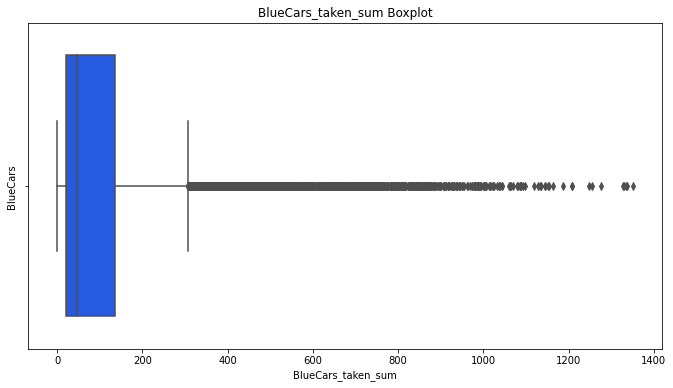

In [73]:
# checking for outliers by plotting box plot
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='BlueCars_taken_sum' ,data = Autolib_data, orient='v', color='#084EFE')
fig.set_title("BlueCars_taken_sum Boxplot")
fig.set_ylabel("BlueCars")

> boxplot indicates outliers for Number of bluecars taken that date in that area from above 300.



/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0, 0.5, 'BlueCars')

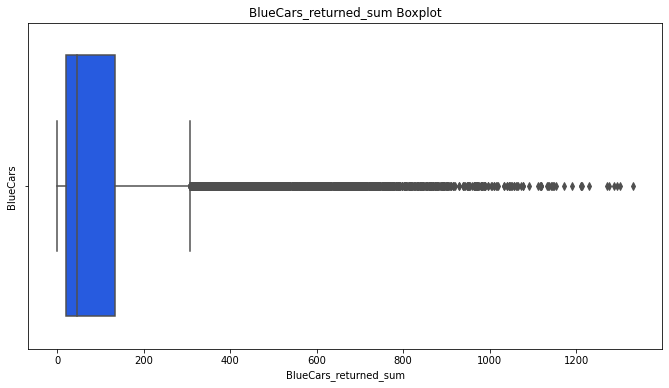

In [74]:
# checking for outliers by plotting box plot
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='BlueCars_returned_sum' ,data = Autolib_data, orient='v', color='#084EFE')
fig.set_title("BlueCars_returned_sum Boxplot")
fig.set_ylabel("BlueCars")

> boxplot indicates outliers for Number of bluecars returned that date in that area above 300.



In [75]:
Autolib_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal code,16085.0,88791.293876,7647.342000,75001.0,91330.0,92340.0,93400.0,95880.0
n_daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.0,1440.0,1440.0,1440.0
dayOfWeek,16085.0,2.969599,2.008378,0.0,1.0,3.0,5.0,6.0
BlueCars_taken_sum,16085.0,125.926951,185.426579,0.0,20.0,46.0,135.0,1352.0
BlueCars_returned_sum,16085.0,125.912714,185.501535,0.0,20.0,46.0,135.0,1332.0
Utilib_taken_sum,16085.0,3.698290,5.815058,0.0,0.0,1.0,4.0,54.0
Utilib_returned_sum,16085.0,3.699099,5.824634,0.0,0.0,1.0,4.0,58.0
Utilib_14_taken_sum,16085.0,8.600560,12.870098,0.0,1.0,3.0,10.0,100.0
Utilib_14_returned_sum,16085.0,8.599192,12.868993,0.0,1.0,3.0,10.0,101.0
Slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.0,0.0,5.0,360.0


Obervations based on above Summary;
*  day of the week: Since the min =0 and max value = 6 i.e. with the values of 0,1,2,3,4,5,6 this is a Categorical variable 
*   the sum no. of blue cars taken and returned It looks a bit skewed towards the right side as mean (125) is greater than median 50% (46) and there may be many outliers at the top end of value
*    the sum no. of blue cars taken and returned have almost the same distribution
*   number of daily data poinst that were available for aggregation, that day  It looks a bit skewed towards the left side as mean (1431) is less than median 50% (1440) and there may be outliers at the top end of value


Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, 'BlueCars_returned_sum')

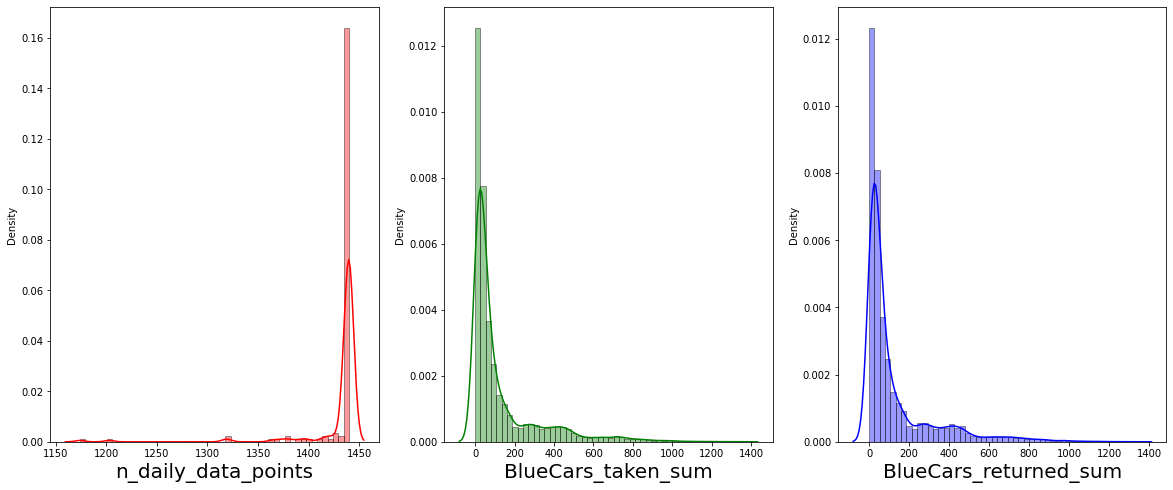

In [76]:
 # Distribution of ‘n_daily_data_points’, ‘BlueCars_taken_sum’ and ‘BlueCars_returned_sum’ columns.
 f, axes = plt.subplots(1, 3, figsize=(20, 8))
n_daily_data_points = sns.distplot(Autolib_data['n_daily_data_points'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
n_daily_data_points.set_xlabel("n_daily_data_points",fontsize=20)

BlueCars_taken_sum = sns.distplot(Autolib_data['BlueCars_taken_sum'], color='green', ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
BlueCars_taken_sum.set_xlabel("BlueCars_taken_sum",fontsize=20)

BlueCars_returned_sum = sns.distplot(Autolib_data['BlueCars_returned_sum'], color='blue', ax = axes[2], kde=True, hist_kws={"edgecolor":"k"})
BlueCars_returned_sum.set_xlabel("BlueCars_returned_sum",fontsize=20)


*   n_daily_data_points : left  skewed.
*   BlueCars_taken_sum : Right skewed.
*   BlueCars_returned_sum: Right skewed.

In [77]:
# Measure of skewness of ‘n_daily_data_points’, ‘BlueCars_taken_sum’ and ‘BlueCars_returned_sum’ columns
pd.DataFrame.from_dict(dict(
    {'n_daily_data_points':Autolib_data.n_daily_data_points.skew(), 
        'BlueCars_taken_sum': Autolib_data.BlueCars_taken_sum.skew(), 
        'BlueCars_returned_sum': Autolib_data.BlueCars_returned_sum.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
n_daily_data_points,-5.742776
BlueCars_taken_sum,2.406355
BlueCars_returned_sum,2.412085


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'BlueCars_returned')

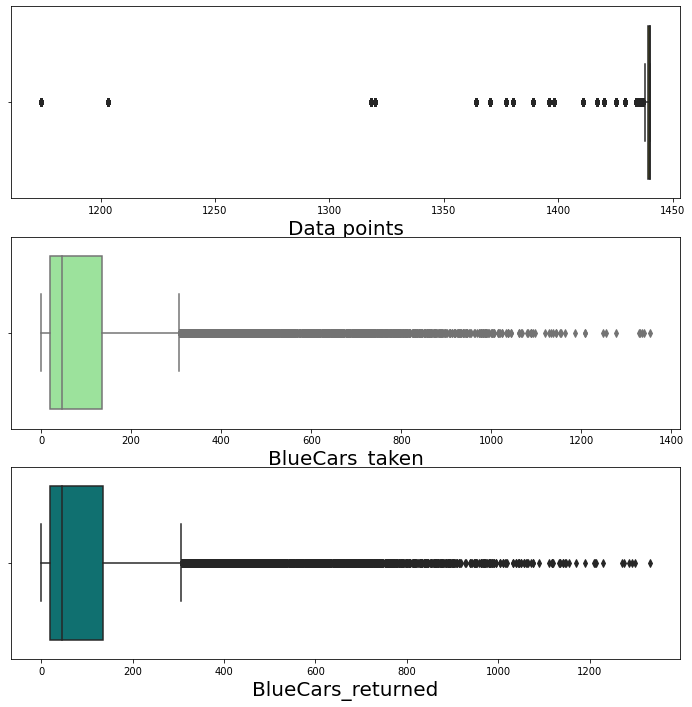

In [78]:
# Checking the presence of outliers in ‘n_daily_data_points’, ‘BlueCars_taken_sum’ and ‘BlueCars_returned_sum’ columns
f, axes = plt.subplots(3, 1, figsize=(12, 12))
n_daily_data_points = sns.boxplot(Autolib_data['n_daily_data_points'], color="olive", ax=axes[0])
n_daily_data_points.set_xlabel("Data points",fontsize=20)

BlueCars_taken_sum = sns.boxplot(Autolib_data['BlueCars_taken_sum'], color='lightgreen', ax=axes[1])
BlueCars_taken_sum.set_xlabel("BlueCars_taken",fontsize=20)

BlueCars_returned_sum = sns.boxplot(Autolib_data['BlueCars_returned_sum'], color='teal', ax=axes[2])
BlueCars_returned_sum.set_xlabel("BlueCars_returned",fontsize=20)

*   Data points : left skewed with with few outliers
*   Blue cars taken: Right skewed with many outliers i.e lot of higher values
*   Blue cars returned : Right skewed with many outliers i.e lot of higher values






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Day')

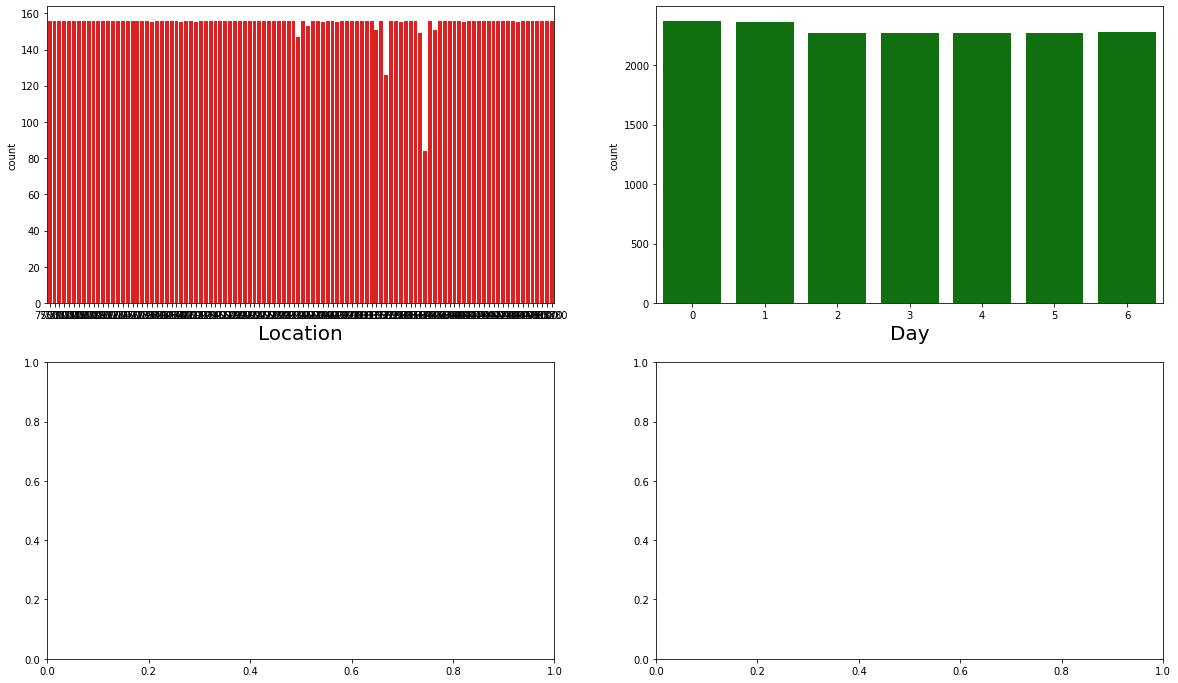

In [79]:
# Distribution of categorical columns; 'Postal code','dayOfWeek'
f, axes = plt.subplots(2, 2, figsize=(20, 12))
Postal_code = sns.countplot(Autolib_data['Postal code'], color="red", ax=axes[0,0])
Postal_code.set_xlabel("Location",fontsize=20)

dayOfWeek = sns.countplot(Autolib_data['dayOfWeek'], color='green', ax = axes[0,1])
dayOfWeek.set_xlabel("Day",fontsize=20)



Bivariate analysis

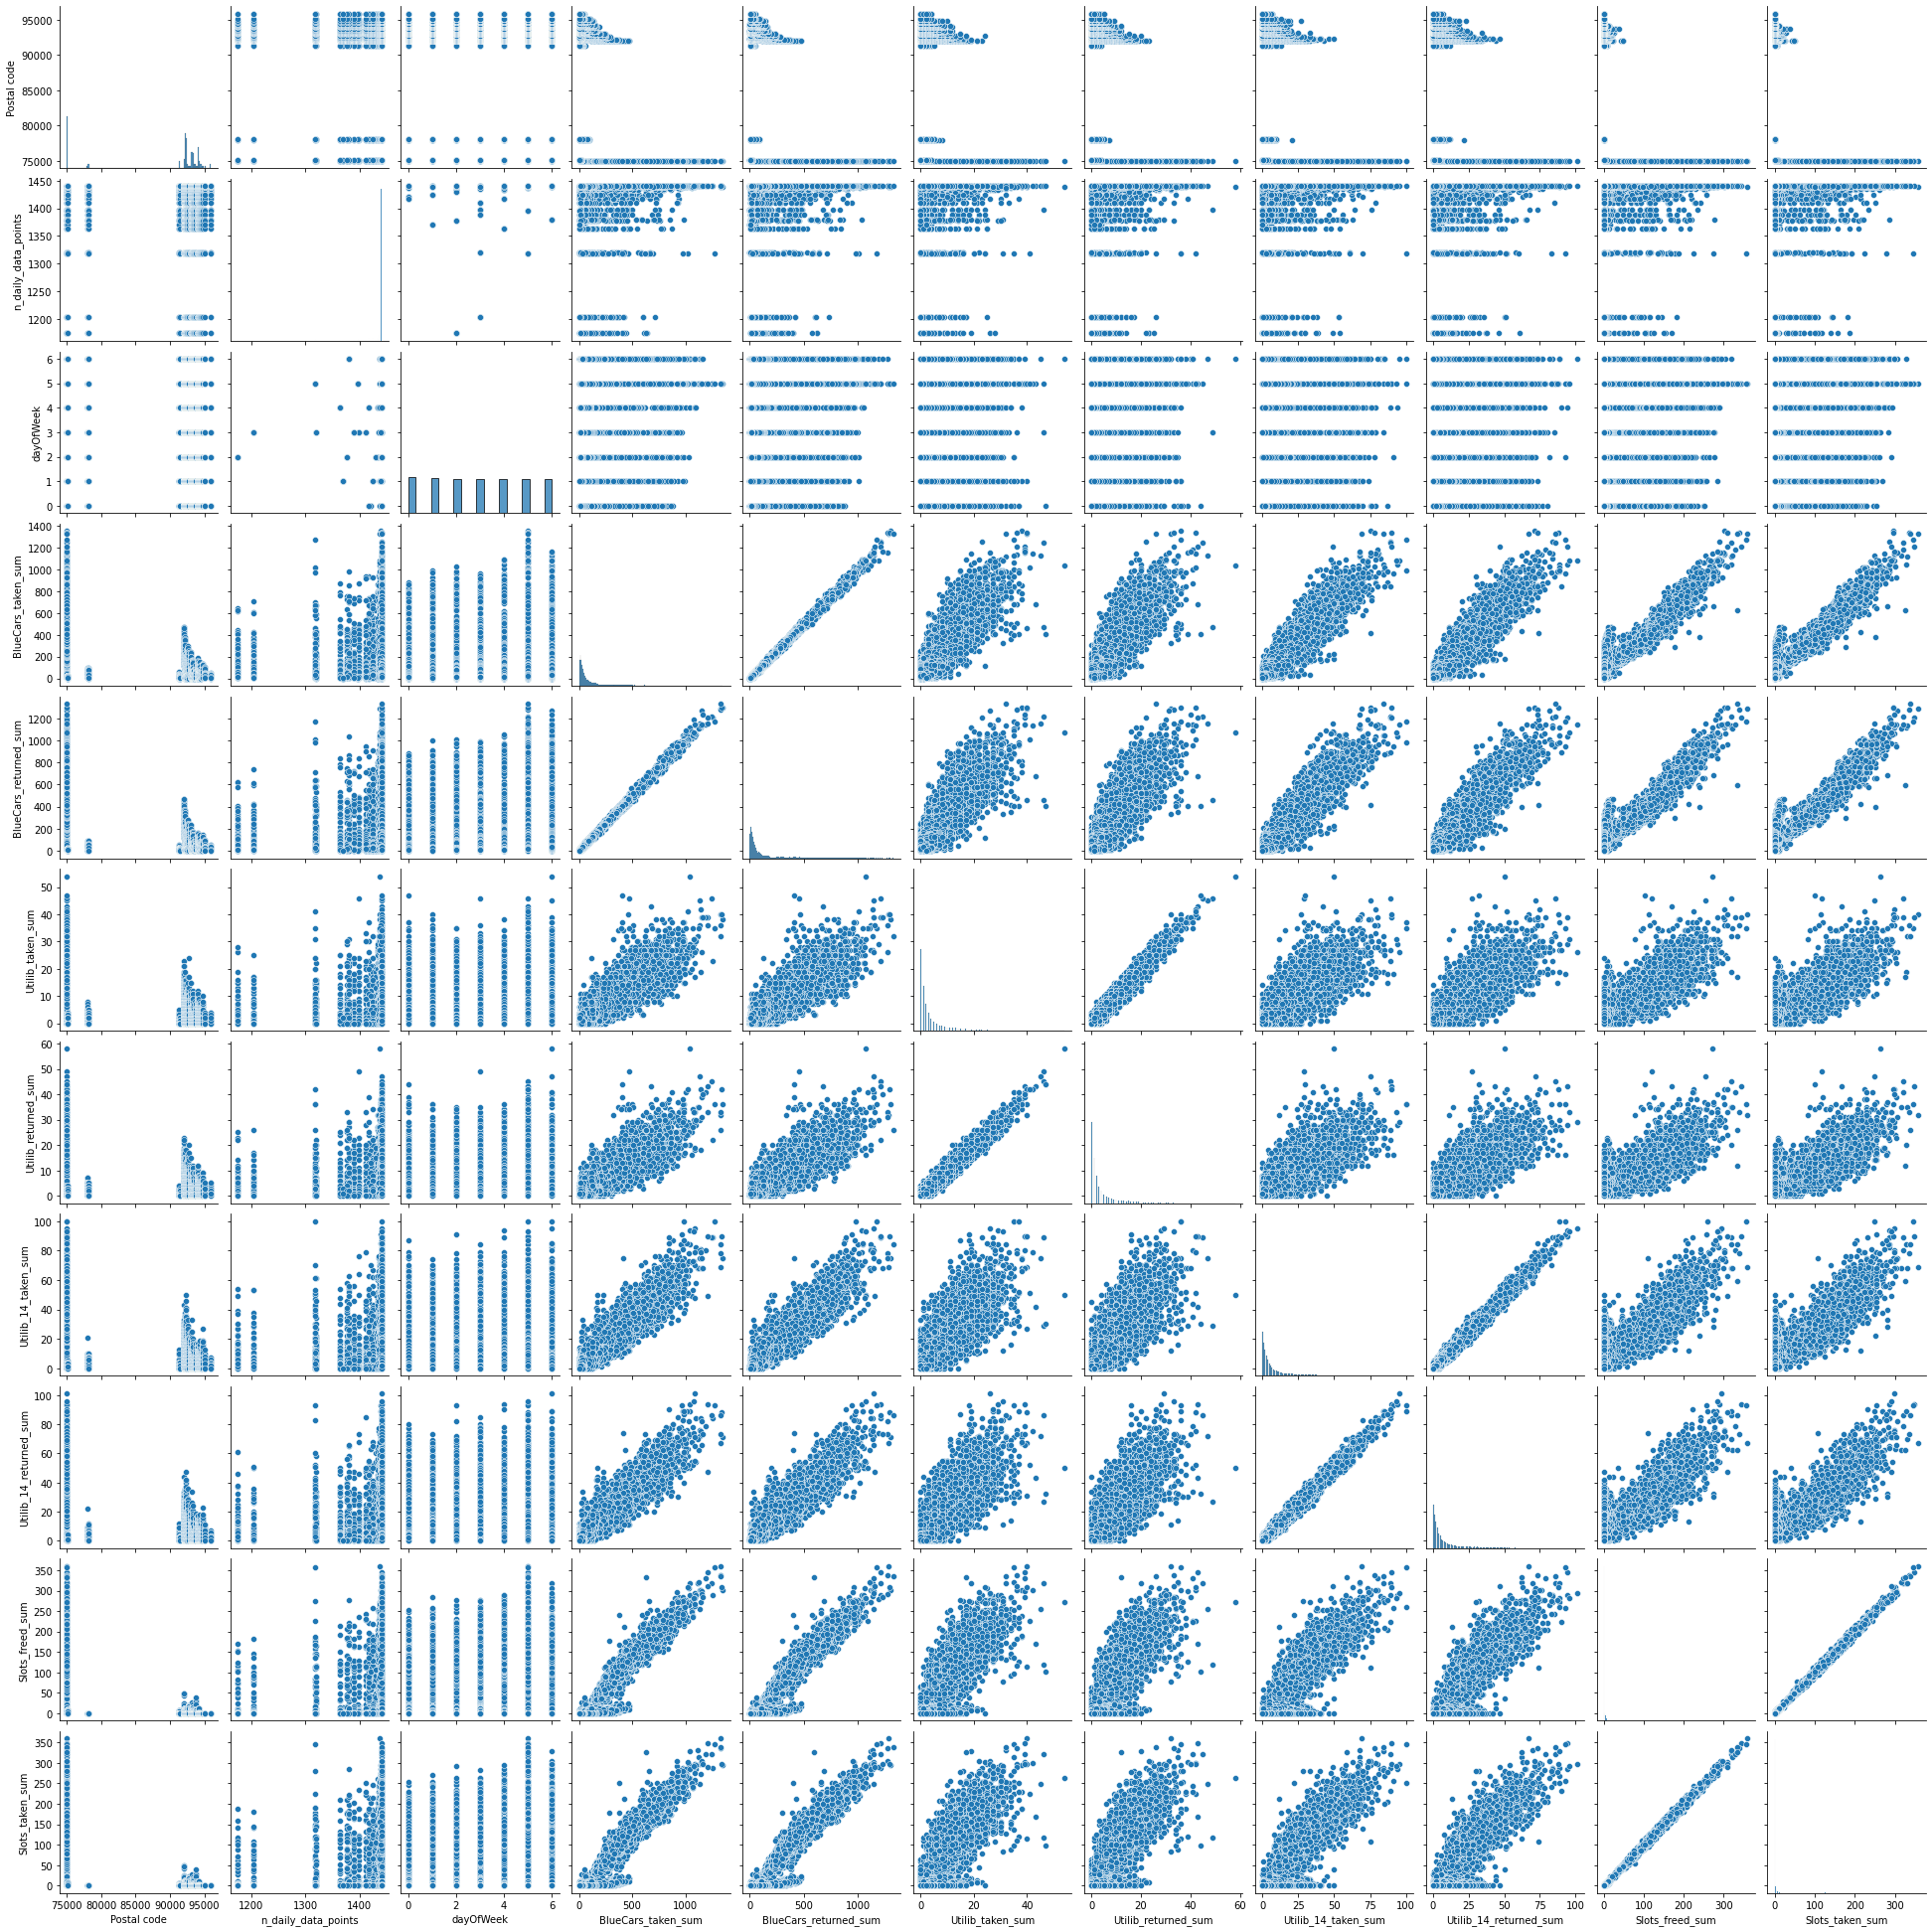

In [ ]:
#  Pair plot that includes all the columns of the data frame
sns.pairplot(Autolib_data)

In [80]:
Autolib_data.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


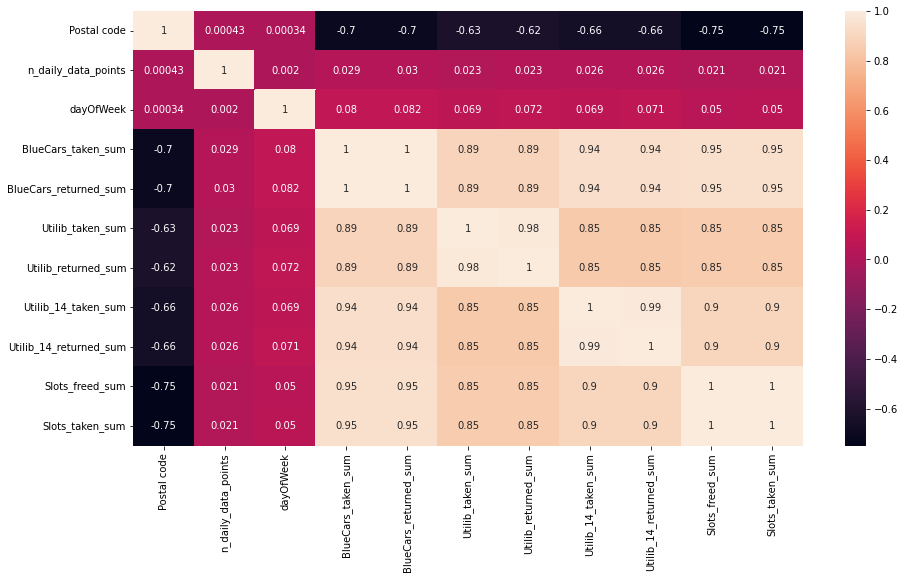

In [81]:

plt.figure(figsize=(15, 8))
vg_corr = Autolib_data.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

<Figure size 2880x1440 with 0 Axes>

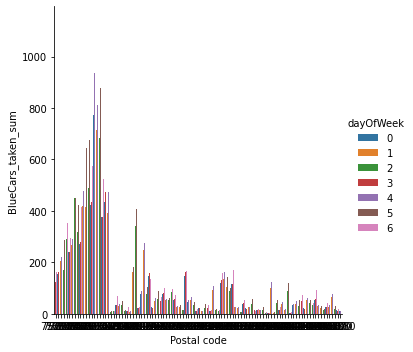

In [82]:
plt.figure(figsize=(40,20))
sns.catplot(data= Autolib_data, y= 'BlueCars_taken_sum',
            x= 'Postal code',
            hue= 'dayOfWeek',
            kind= 'bar',ci= None);

**Hypothesis Testing Report**

**1.   Problem Statement**
>This dataset was an autolib dataset for Autolib electric car sharing company containing details about the operation of cars within Paris. It showed a compilation of dates when the blue cars were taken from and returned to the particular location referenced by postal code. The claim being investigated was whether or not the average number of blue cars taken from code 17015 was not different from the average number of blue cars taken from code 17017 during the weekdays(same period).




1.   ** ** Null hypothesis:** **
*   average number of blue cars taken from code 17015 was not different the average number of blue cars taken from code 17017 during the weekdays.
2.   **Alternative hypothesis: **
* average number of blue cars taken from code 17015 was different the average number of blue cars taken from code 17017 during the weekdays.(CLAIM:)







> The purpose of this hypothesis is important for the understanding of the data and its distribution.



**Data Description**

>



> The dataset i used for this investigation was an open dataset about Autolib electric car-sharing service company in Paris. It contains features such as the postal code of the location (Paris), the dates of data collection. The dates of collection was from January to July, 2018. The dataset had the number of daily data points that were available for aggregation on the particular days of aggregation within the specified time periods, specific days of the week from Monday to Sunday within the time period. The blue cars that were picked and returned, the utilib data and the slots set of data were also contained in the dataset.
The problem under investigation was on the averages of two specific locations which would make the null and alternative hypotheses.
It was a set of data that was already collected. However, if i were to collect such  data, i would use my data research team to go out in the field, collect the data and perform the analysis from which conclusions would later on be made.




In [92]:
# keeping the columns under investigation
Autolib_data1 = Autolib_data[["Postal code","dayOfWeek", "BlueCars_taken_sum"]]
Autolib_data1.head()


,Postal code,dayOfWeek,BlueCars_taken_sum
0,75001,0,110
1,75001,1,98
2,75001,2,138
3,75001,3,104
4,75001,4,114


In [108]:
# keeping the specific postal code(75015&75017) under investigation
Autolib_data2 = Autolib_data1.loc[Autolib_data1['Postal code'].isin([75015,75017])]
Autolib_data2.head



<bound method NDFrame.head of       Postal code  dayOfWeek  BlueCars_taken_sum
2184        75015          0                 781
2185        75015          1                 710
2186        75015          2                 739
2187        75015          3                 669
2188        75015          4                 852
...           ...        ...                 ...
2647        75017          4                 766
2648        75017          5                 859
2649        75017          6                 729
2650        75017          0                 650
2651        75017          1                  38

[312 rows x 3 columns]>

In [111]:
# keeping the specific period under consideration (Mon,Tue, Wed, Thur & Fri) under investigation
Autolib_data3 = Autolib_data2.loc[Autolib_data1['dayOfWeek'].isin([0,1,2,3,4])]
Autolib_data3.head

<bound method NDFrame.head of       Postal code  dayOfWeek  BlueCars_taken_sum
2184        75015          0                 781
2185        75015          1                 710
2186        75015          2                 739
2187        75015          3                 669
2188        75015          4                 852
...           ...        ...                 ...
2645        75017          2                 777
2646        75017          3                 710
2647        75017          4                 766
2650        75017          0                 650
2651        75017          1                  38

[224 rows x 3 columns]>

In [116]:
for column in Autolib_data3.columns:
    print(column)
    print(Autolib_data3[column].value_counts())
    print('*********************************')
    

Postal code
75015    112
75017    112
Name: Postal code, dtype: int64
*********************************
dayOfWeek
0    46
1    46
2    44
3    44
4    44
Name: dayOfWeek, dtype: int64
*********************************
BlueCars_taken_sum
739    4
740    4
723    4
733    3
766    3
      ..
955    1
962    1
887    1
875    1
38     1
Name: BlueCars_taken_sum, Length: 164, dtype: int64
*********************************


In [120]:
# finally drop day of the week
Autolib = Autolib_data3.drop(['dayOfWeek'], axis=1)
Autolib.head()

,Postal code,BlueCars_taken_sum
2184,75015,781
2185,75015,710
2186,75015,739
2187,75015,669
2188,75015,852


*  since the hypothesis involves the difference of sample means, the appropriate test statistic will be the Z-test as the sample size, n>30
*z-test,tests whether the means of two paired samples are significantly different.











Assumptions
*   Observations in each sample are independent and identically distributed 
*   Observations in each sample are normally distributed.
*  Observations across each sample are paired.
*  Observations in each sample have the same variance.




In [ ]:
# Observations in each sample are independent and identically distributed 
# data sample taken randomly thus assumed to be random


In [128]:

Autolib75015  = Autolib.loc[Autolib['Postal code'].isin([75015])]
Autolib75015.head

<bound method NDFrame.head of       Postal code  BlueCars_taken_sum
2184        75015                 781
2185        75015                 710
2186        75015                 739
2187        75015                 669
2188        75015                 852
...           ...                 ...
2333        75015                 920
2334        75015                 946
2335        75015                1093
2338        75015                 669
2339        75015                  49

[112 rows x 2 columns]>

In [146]:

Autolib75015_Data = Autolib75015.drop(['Postal code'], axis = 1) 
Autolib75015_Data

,BlueCars_taken_sum
2184,781
2185,710
2186,739
2187,669
2188,852
...,...
2333,920
2334,946
2335,1093
2338,669


In [129]:
Autolib75017  = Autolib.loc[Autolib['Postal code'].isin([75017])]
Autolib75017.head


<bound method NDFrame.head of       Postal code  BlueCars_taken_sum
2496        75017                 634
2497        75017                 548
2498        75017                 638
2499        75017                 553
2500        75017                 705
...           ...                 ...
2645        75017                 777
2646        75017                 710
2647        75017                 766
2650        75017                 650
2651        75017                  38

[112 rows x 2 columns]>

In [147]:

Autolib75017_Data = Autolib75015.drop(['Postal code'], axis = 1) 
Autolib75017_Data

,BlueCars_taken_sum
2184,781
2185,710
2186,739
2187,669
2188,852
...,...
2333,920
2334,946
2335,1093
2338,669


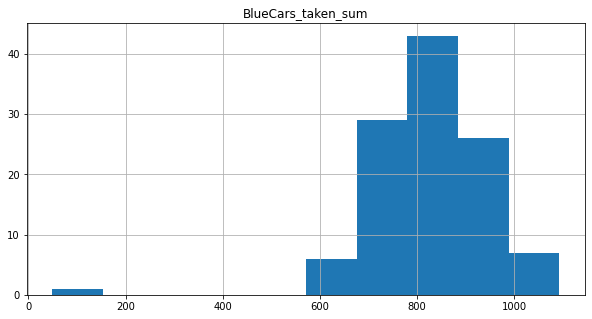

In [148]:

# normality test
# checking the distribution of a numerical features by plotting its histogram,
distr = ['BlueCars_taken_sum']
Autolib75015_Data[distr ].hist(figsize=(10,5));

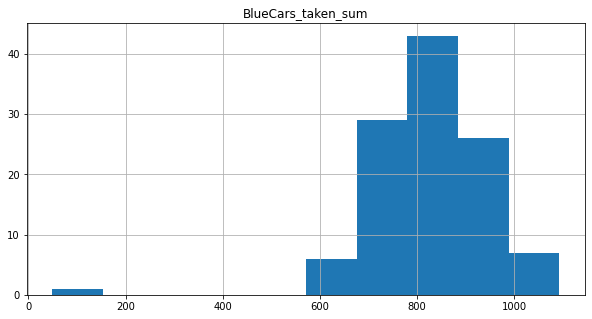

In [149]:
distr = ['BlueCars_taken_sum']
Autolib75017_Data[distr ].hist(figsize=(10,5));


> sample is look normally distributed but with outlier points below 200 that needs to be removed



In [140]:

index_names = Autolib75017[ (Autolib75017['BlueCars_taken_sum'] <= 300)].index
Autolib75017_A = Autolib75017.drop(index_names, inplace = True)
index_names = df[ df['Age'] == 21 ].index

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [125]:
#perform one sample z-test
from statsmodels.stats.weightstats import ztest as ztest
ztest(Autolib, value=100)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([1.11873445e+06, 7.90363853e+01]), array([0., 0.]))

In [151]:
# choosing a Significance level - The significance level is 0.05.
# performing z-test to determine if the mean of the sum of blue cars taken is different between the two postal codes
# choosing sample size as n=70
from statsmodels.stats.weightstats import ztest as ztest
ztest(Autolib75015_Data, Autolib75017_Data, value=70)


(array([-4.1824982]), array([2.88323307e-05]))

In [ ]:
# The test statistic for the two sample z-test is -4.182 and the corresponding p-value is 0.0003
#Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, 
# the average of the blue cars taken is significantly different between the two areas.